<a href="https://colab.research.google.com/github/Aravindraj27/ML_Projects/blob/main/Titanic_contest_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Tensor Flow 
The Below code is used to specify the version of tensor flow we want to use for the project. This is required especially in a notebook since in the IDEs we can create a virtual environment that hasour required version or manually set the version in the GUI

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


##Tensors 
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape. 

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.

In [ ]:
# Rank 0 - Scalar values
string = tf.Variable("Bulgogi",tf.string)
integer = tf.Variable(365, tf.int16)
flt = tf.Variable(3.14159, tf.float64)

###Rank/Degree of a Tensor
- It is simply the number of dimensions of a tensor
- An **array with only one element** is considered to be a **rank one** where as the **above code is a rank 0** because **moving the array to a higher dimension will not cause any problem**
- **tensorflow.rank(tensor_name)** is used to check the rank of a tensor.

In [ ]:
rank1_tensor = tf.Variable(["Hello","World"],tf.string)
rank2_tensor = tf.Variable([[1,2,4],[3,4,6]],tf.int16)
# Checking the rank of a tensor
print(tf.rank(rank1_tensor))
print(tf.rank(rank2_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### Shape of a Tensor
- This is the **amount of elemnts present in each dimension** of a tensor
- Tensor flow always tries to calculate the shape of the tensor but sometimes its unknown
- **.shape()** is used to check the shape of the tensor

In [ ]:
print(rank1_tensor.shape)
print(rank2_tensor.shape)


(2,)
(2, 3)


###Changing the shape of a tensor
- This is one of the major aspects of tensor flow and often performed procedure.
- The number of elements in a tensor is calculated by multiplying the shape of the tensor.
- Many shapes are possible for every given number of elements which makes it possible for us to change the shape of the matrix (i.e.) tensor.
- **tensorflow.reshape(tensor,shape)** is used to reshape the matrix

**Example :** 

a tensor with four elements can be of the shape(2,2) or (1,4) or (4,1)

In [ ]:
tensor1 = tf.ones([1,2,3],tf.int16) # Creates a matrix of dimension 1,2,3 (i.e.) 1 row, 2 lists in that row, 3 elements in each row
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1]) # Reshapes the tensor to 2,3,1 (i.e.) 2 rows, 3 lists in each row, 1 element in each list
print (tensor2)
tensor3 = tf.reshape(tensor1, [3,-1]) # here the -1 helps us to distribute the elemnts equally among 3 rows (i.e.) 3 rows and two elements in each row
print(tensor3)

tf.Tensor(
[[[1 1 1]
  [1 1 1]]], shape=(1, 2, 3), dtype=int16)
tf.Tensor(
[[[1]
  [1]
  [1]]

 [[1]
  [1]
  [1]]], shape=(2, 3, 1), dtype=int16)
tf.Tensor(
[[1 1]
 [1 1]
 [1 1]], shape=(3, 2), dtype=int16)


### Types Of Tensor
There are various types of tensors to name a few
- Variable

- Constant
- Placeholder
- Sparse tensors

Except for **variables** all the other tensors are **immutable**

###Evaluating a Tensor
- Sometimes we need to evaluate the tensors meaning we need to get the value. 
- Since a tensor represents a partially coomplete computation we need to run a session to evaluate a tensor
- .eval() is used to evaluate the tensor
- Sample Code : A simple sample piece of code is given below

In [ ]:
#with tf.compat.v1.Session() as session : # Creates a session with a default graph
#  tensor1.eval()

###Linear Regression

This is a basic machine learning algorithm to predict numerical values like the stock price calculation, Housing price prediction, Wear and tear of any tool, etc.
Here we are using it on the Titanic dataset to predict the survival percent of its passengers.
###Hypothesis for the Linear Regression

Hypothesis = X<sup>T</sup> $\theta$

- X = feature matrix
- y = label vector
- $\theta$ = Coefficients vector

A simple linear regression can be written in the following format

Hypothesis = $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x<sub>1</sub> which is a simple line equation and based on the cost function we can use various polynomial functions here to get a beteer fitting curve

####Cost Function
**Cost function** is the measure of accuracy of the hypothesis (i.e.) the distance between each point in the graph to the plotted line for linear regression. 

It uses the Squared error function to calculate the distance a
We use the **cost function** inorder to find and the minimize the distance between the plotted points and the the line of linear regression. 

J =  $\sum\limits_{i=0}^m$ (h<sub>$\theta$</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)<sup>2</sup>

The Cost function can be calculated by other different methods such as kullback divergence cross entropy loss functions based on the type of problem we are trying to solve

For regression problems we generally use squared error or huber loss.

The values of $\theta$ can be found by doing a **Gradient Descent**.

In [ ]:
!pip install -q sklearn

###Import the libraries required to do Linear regression

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from six.moves import urllib

###Import the data
In this data set we could get a fair idea about the dataset, the columns and the data in the column. We have removed the Passenger ID since there is already a index that can be used on any specific data.

In [ ]:
dataframe = pd.read_csv('train.csv') 
trainset = pd.read_csv('train.csv')
trainset.pop('PassengerId')
print(trainset.head())
print(trainset.describe())
testset = pd.read_csv('test.csv')
testset.pop('PassengerId')
print(testset.head())
print(testset.describe())
y_train = trainset.pop('Survived')
y_test = pd.read_csv('gender_submission.csv').pop('Survived')
#trainset.Age.hist(bins=1000)

   Survived  Pclass  ... Cabin Embarked
0         0       3  ...   NaN        S
1         1       1  ...   C85        C
2         1       3  ...   NaN        S
3         1       1  ...  C123        S
4         0       3  ...   NaN        S

[5 rows x 11 columns]
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
   Pclass                          

###Histogram
The Following section will contain an histogram to find the distribution of various columns among the passengers for the train set.

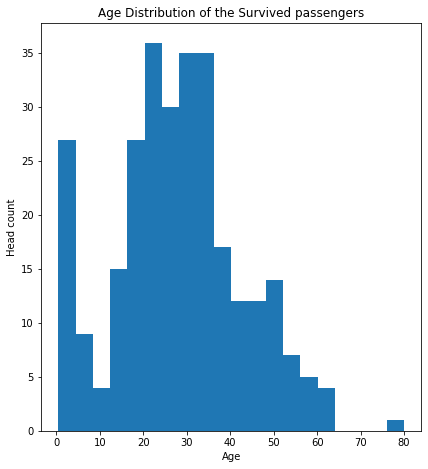

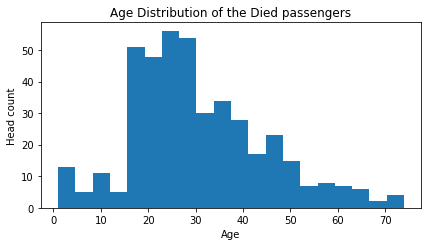

In [ ]:
# Age Distribution
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.hist(dataframe[dataframe.Survived == 1].Age, bins=20)
plt.title("Age Distribution of the Survived passengers")
plt.xlabel("Age")
plt.ylabel("Head count")
plt.show()

plt.figure(figsize=(15,7.5))
plt.subplot(2,2,1)
plt.hist(dataframe[dataframe.Survived == 0].Age, bins=20)
plt.title("Age Distribution of the Died passengers")
plt.xlabel("Age")
plt.ylabel("Head count")
plt.show()

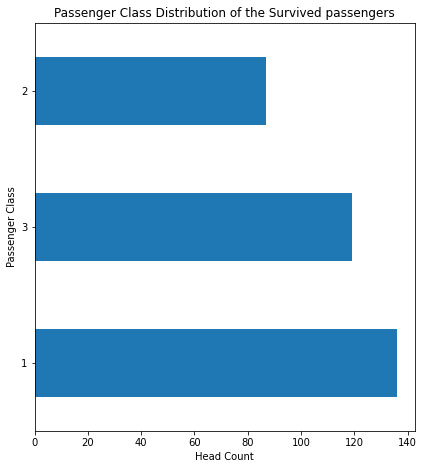

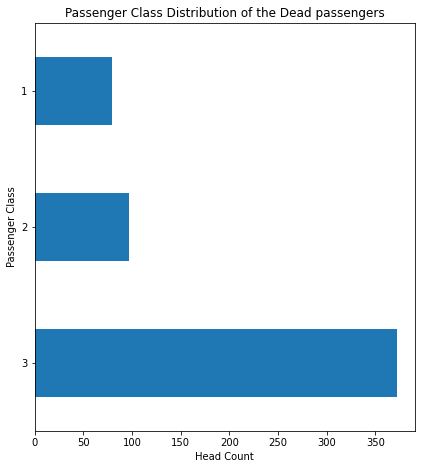

In [ ]:
# Passenger Class Distribution
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
dataframe[dataframe.Survived==1].Pclass.value_counts().plot(kind = 'barh')
plt.title("Passenger Class Distribution of the Survived passengers")
plt.xlabel("Head Count")
plt.ylabel("Passenger Class")
plt.show()

plt.figure(figsize=(15,7.5))
plt.subplot(1,2,2)
dataframe[dataframe.Survived==0].Pclass.value_counts().plot(kind = 'barh')
plt.title("Passenger Class Distribution of the Dead passengers")
plt.xlabel("Head Count")
plt.ylabel("Passenger Class")
plt.show()

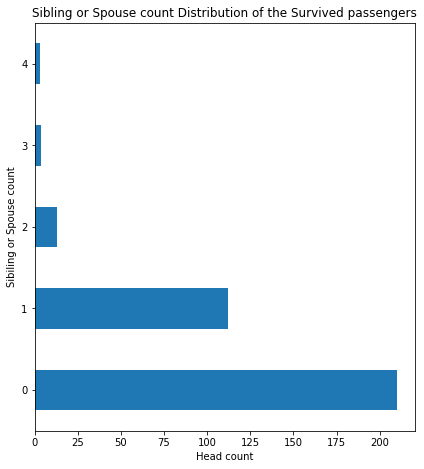

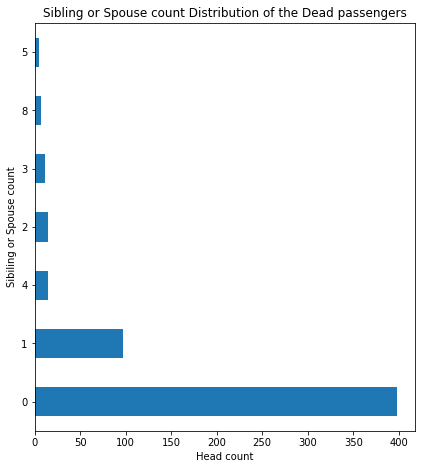

In [ ]:
# Sibling or Spouse for the passengers
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
dataframe[dataframe.Survived==1].SibSp.value_counts().plot(kind = 'barh')
plt.title("Sibling or Spouse count Distribution of the Survived passengers")
plt.xlabel("Head count")
plt.ylabel("Sibiling or Spouse count")
plt.show()

plt.figure(figsize=(15,7.5))
plt.subplot(1,2,2)
dataframe[dataframe.Survived==0].SibSp.value_counts().plot(kind = 'barh')
plt.title("Sibling or Spouse count Distribution of the Dead passengers")
plt.xlabel("Head count")
plt.ylabel("Sibiling or Spouse count")
plt.show()

###Data Cleaning

This is used to clean the data set that we have to **deal with** all the missing values based on their importance to predict the data. 

Why Deal with?

* Sometimes the column with a **large amount of unknown data** might have more weightage over the result than other columns so we can't remove the column so instead we calculate the mean, median based on the type of data. 
* But sometimes we can simply eliminate that column When the number of **missing data is less** we can opt for removing the column but if the data set is really small or if the type of data (Classification) is small then we must do a mean or median to fill the remaining data.

In [ ]:
# CSV has been loaded in the dataframe table
dataframe = pd.read_csv('train.csv')
dataframe.pop('PassengerId')
dataframe.describe()
#print(dataframe.head())
#print(dataframe['Cabin'].isna().sum())
dataframe.pop('Name')
dataframe.pop('Cabin')
dataframe.pop('Ticket')
#print(dataframe['Age'].isna().sum())
dataframe['Age'] = dataframe['Age'] * 365
#print(dataframe['Age'].head())
#print(dataframe.columns)
catagorical_columns=['Sex', 'Embarked']
numerical_columns = ['Pclass','Age','SibSp','Parch','Fare']
dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)
dataframe.dropna(inplace=True)
print(dataframe.describe)
feature_columns=[]
dataframe.dropna()
for feature_name in catagorical_columns:
  vocabulary = dataframe[feature_name].unique() #gets all the unique values in the column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in numerical_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name))
print(feature_columns)
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],remainder='passthrough')
# label = dataframe.pop('Survived')
# feature_matrix = dataframe
# feature_matrix = np.array(ct.fit_transform(feature_matrix))
#print(feature_matrix)

<bound method NDFrame.describe of      Survived  Pclass     Sex      Age  SibSp  Parch     Fare Embarked
0           0       3    male   8030.0      1      0   7.2500        S
1           1       1  female  13870.0      1      0  71.2833        C
2           1       3  female   9490.0      0      0   7.9250        S
3           1       1  female  12775.0      1      0  53.1000        S
4           0       3    male  12775.0      0      0   8.0500        S
..        ...     ...     ...      ...    ...    ...      ...      ...
886         0       2    male   9855.0      0      0  13.0000        S
887         1       1  female   6935.0      0      0  30.0000        S
888         0       3  female  10220.0      1      2  23.4500        S
889         1       1    male   9490.0      0      0  30.0000        C
890         0       3    male  11680.0      0      0   7.7500        Q

[889 rows x 8 columns]>
[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.

###Short Summary of what was done above
* In the above dataframe the Passenger Id, Name and ticket were removed because they are irrelevant and do not affect the result.
* The Cabin column was removed because there were around 600+ missing values.
* The Age was converted into units of days because of the fractional values present for the babies on board and the missing values were filled up with the median value of the ages.
* We used tensor flow to encode categorical data and following that in the comment section is where we use scikit learn to encode catagorical data
